In [ ]:
# Image Processing Assignment 3
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
import os
import cv2
from tqdm import tqdm
import shutil
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from keras.models import Sequential
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.svm import SVC
from keras.optimizers import SGD, RMSprop
import keras
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [1]:
#Load Data

In [ ]:
train_path = "/data/train"
test_path = "/data/test"

In [ ]:
#Initial Function Showing initial images
def showInitialImages(folder, name):
    for i in range(1,9):
        plt.subplot(330 + 1 + i)
        filename = folder + "/" + name + '.' + str(i) + '.jpg'

        #Shows that the images are different sizes
        image = PIL.Image.open(filename)
        (width, height) = image.size
        print((width, height), "Dimensions of ", name + '.' + str(i) + '.jpg')

        image = cv2.imread(filename)
        plt.imshow(image)

    plt.show()

(327, 499) Dimensions of  dog.1.jpg
(187, 199) Dimensions of  dog.2.jpg
(499, 375) Dimensions of  dog.3.jpg
(300, 287) Dimensions of  dog.4.jpg
(499, 376) Dimensions of  dog.5.jpg
(499, 488) Dimensions of  dog.6.jpg
(299, 264) Dimensions of  dog.7.jpg
(469, 500) Dimensions of  dog.8.jpg


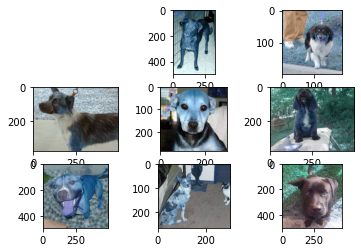

(300, 280) Dimensions of  cat.1.jpg
(312, 396) Dimensions of  cat.2.jpg
(500, 414) Dimensions of  cat.3.jpg
(499, 375) Dimensions of  cat.4.jpg
(175, 144) Dimensions of  cat.5.jpg
(400, 303) Dimensions of  cat.6.jpg
(495, 499) Dimensions of  cat.7.jpg
(461, 345) Dimensions of  cat.8.jpg


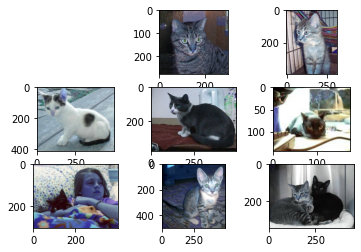

In [ ]:
categories = ["dog","cat"]
for cate in categories:
  showInitialImages(train_path, cate)

In [ ]:
#Definition of important functions for Reading in the data and preprocessing
def plotImage(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.show()


def getLabels(folder):
  labels = []

  for f in tqdm(os.listdir(folder)):
    if "dog" in f:
      labels.append(1)
    else :
      labels.append(0)

  return labels

def readAndResizeImages(folder, withGrayScale):
    height = 350
    width = 350

    dim = (width, height)
    
    images = []

    for f in tqdm(os.listdir(folder)):
      #Read
      try :
        if withGrayScale:
          image = cv2.imread(os.path.join(folder,f),cv2.IMREAD_GRAYSCALE) 
        else :
          image = cv2.imread(os.path.join(folder,f)) 
        #Resize
        resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_LINEAR)
        #Normalize
        normalized_image = cv2.normalize(resized_image,None ,0, 255, cv2.NORM_MINMAX)
        images.append(normalized_image)

      except:

        pass

    return images


def plotROC(prediction, title):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prediction)
    plt.plot(fpr, tpr)
    plt.title("ROC Curve for " + title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [ ]:
x = readAndResizeImages(train_path,withGrayScale = True)

100%|██████████| 1012/1012 [16:44<00:00,  1.01it/s]


In [ ]:
x[0].shape

(350, 350)

In [ ]:
y = getLabels(train_path)

100%|██████████| 1012/1012 [00:00<00:00, 417861.36it/s]


In [ ]:
print(np.array(y).shape)

(1012,)


In [ ]:
X = np.array(x)
y = np.array(y)
y.shape

print(y)

[1 1 0 ... 1 0 0]


In [ ]:
#Need to reshape data for the KNN and other traditional algorithms before spliting
X_train_1 = np.reshape(X, (X.shape[0], -1))
print(X_train_1.shape)

(1012, 122500)


In [ ]:
(x_train, x_test, y_train, y_test) = train_test_split(X_train_1, y, test_size=0.15, random_state=42)
x_train.shape

(860, 122500)

In [ ]:
model = KNeighborsClassifier(n_neighbors=3, algorithm='brute')
model.fit(x_train, y_train)

num_test = 152
y_test_pred = model.predict(x_test)

y_test_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
print ('Got accuracy: %f' % ( accuracy))

Got accuracy: 0.592105


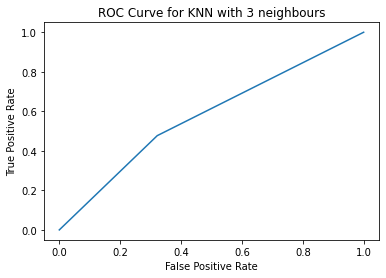

In [ ]:
plotROC(y_test_pred,"KNN with 3 neighbours")

In [ ]:
#Perform Cross Validation to get best k
k_range = [3,5,7,9,15,20,30]
k_scores = []

In [ ]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_1, y, cv=10, scoring='accuracy')
    k_scores.append(scores)

print(k_scores)


[array([0.58823529, 0.49019608, 0.56435644, 0.53465347, 0.56435644,
       0.5049505 , 0.55445545, 0.6039604 , 0.51485149, 0.56435644]), array([0.61764706, 0.52941176, 0.63366337, 0.59405941, 0.55445545,
       0.58415842, 0.55445545, 0.62376238, 0.52475248, 0.48514851]), array([0.59803922, 0.54901961, 0.58415842, 0.64356436, 0.4950495 ,
       0.56435644, 0.59405941, 0.68316832, 0.56435644, 0.52475248]), array([0.61764706, 0.54901961, 0.56435644, 0.58415842, 0.47524752,
       0.56435644, 0.54455446, 0.65346535, 0.57425743, 0.57425743]), array([0.59803922, 0.57843137, 0.58415842, 0.63366337, 0.4950495 ,
       0.54455446, 0.55445545, 0.6039604 , 0.55445545, 0.56435644]), array([0.57843137, 0.55882353, 0.57425743, 0.61386139, 0.51485149,
       0.57425743, 0.58415842, 0.63366337, 0.52475248, 0.56435644]), array([0.59803922, 0.58823529, 0.52475248, 0.57425743, 0.4950495 ,
       0.56435644, 0.57425743, 0.64356436, 0.57425743, 0.58415842])]


Text(0, 0.5, 'Accuracy from Cross Validation')

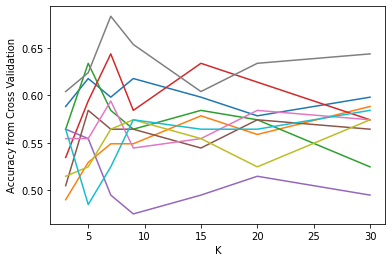

In [ ]:
plt.plot(k_range, k_scores)
plt.xlabel('K')
plt.ylabel('Accuracy from Cross Validation')

In [ ]:
#KNN with 7 neighbours
knn_model2 = KNeighborsClassifier(n_neighbors=7, algorithm='brute')
knn_model2.fit(x_train, y_train)

y_test_pred2 = knn_model2.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred2)

print ('Got accuracy: %f' % ( accuracy))

Got accuracy: 0.631579


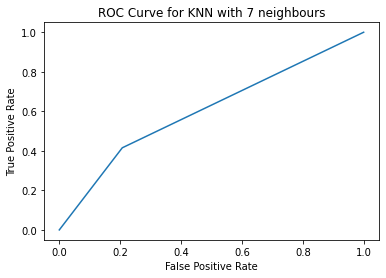

In [ ]:
plotROC(y_test_pred2, "KNN with 7 neighbours")

In [ ]:
#Apply random forest
model_rf = RandomForestClassifier(1000)
model_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# evaluate the model
results = model.predict(x_test)
print (metrics.accuracy_score(results, y_test))

0.5921052631578947


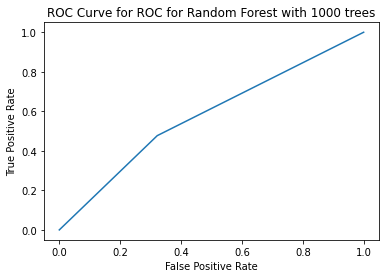

In [ ]:
plotROC(results, "ROC for Random Forest with 1000 trees")

In [ ]:
#Apply logistic regression and evaluate
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression() 
log_clf.fit(x_train, y_train) 
res = log_clf.predict(x_test)
print(metrics.accuracy_score(res, y_test))

0.5789473684210527


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


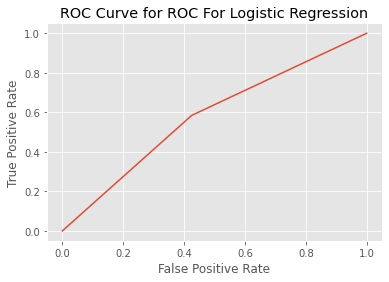

In [ ]:
plotROC(res, "ROC For Logistic Regression")

In [ ]:
# define support vector classifier
svm = SVC(kernel='linear', probability=True, random_state=42)

svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#Evaluate model and get accuracy
svm_results = svm.predict(x_test)
print (metrics.accuracy_score(svm_results, y_test))

0.5592105263157895


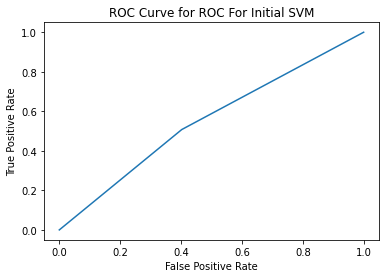

In [ ]:
plotROC(svm_results, "ROC For Initial SVM")

In [ ]:
###################################### Deep Learning Begins #################################################

In [ ]:
### 
def readAndResizeImages2(folder):
    height = 350
    width = 350
    dim = (width, height)
    
    images = []

    for f in tqdm(os.listdir(folder)):
        try:
          image = cv2.imread(os.path.join(folder,f)) 
          # Resize
          resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_LINEAR)
          # Normalize
          normalized_image = cv2.normalize(resized_image, None, 0, 255, cv2.NORM_MINMAX)
          images.append(normalized_image)

        except:
          pass

    return images

In [ ]:
X_training = readAndResizeImages2(train_path)

100%|██████████| 1012/1012 [00:05<00:00, 173.46it/s]


In [ ]:
print(X_training[0].shape)
print(X_training[0].size)

(350, 350, 3)
367500


In [ ]:
X_train = np.array(X_training)
y_training = np.array(y)

In [ ]:
#Split for train and validation
(x_train_2, x_test_2, y_train_2, y_test_2) = train_test_split(X_train, y, test_size=0.15, random_state=42)

print(x_train_2.shape)
print(y_train_2.shape)

(860, 350, 350, 3)
(860,)


In [ ]:
NUM_EPOCHS = 20

In [ ]:
# define first baseline cnn model
def defineBaselineCNNModel():
    
    model = Sequential()

    opt = tf.keras.optimizers.SGD(lr=0.001)

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(350, 350 ,3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
  
    model.add(Dense(1, activation='sigmoid'))  # 1 because we have cat or dog classes

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model

In [ ]:
def defineModel2():
  model = Sequential()
  inputshape = (350, 350 ,3)
  
  opt = tf.keras.optimizers.SGD(lr=0.001)

  #Increased Configuration 1
  model.add(keras.layers.Conv2D (60, (3, 3), padding="same", input_shape=inputshape, activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  #Increased Configuration 2
  model.add(keras.layers.Conv2D (90, (3, 3), padding="same", input_shape=inputshape, activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  #Increased Configuration 3
  model.add(keras.layers.Conv2D (120, (3, 3), padding="same", input_shape=inputshape, activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  #Increased Configuration 4
  model.add(keras.layers.Conv2D (180, (3, 3), padding="same", input_shape=inputshape, activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  #Increased Configuration 5
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(360, activation='relu'))

  #Sigmoid Classifier
  model.add(keras.layers.Dense(1, activation='sigmoid'))

  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


  return model

In [ ]:
#Initialize model
baseline_model = defineBaselineCNNModel()
baseline_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 348, 348, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 174, 174, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 172, 172, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 86, 86, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 84, 84, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 42, 42, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 225792)           

In [ ]:
#Fit baseline model for 20 epochs
history_baseline_model = baseline_model.fit(x_train_2, y_train_2, validation_data = (x_test_2,y_test_2), batch_size=12, epochs=NUM_EPOCHS)

Train on 860 samples, validate on 152 samples
Epoch 1/20
860/860 [==============================] - 7s 8ms/step - loss: 81.9922 - accuracy: 0.5256 - val_loss: 0.7090 - val_accuracy: 0.4737
Epoch 2/20
860/860 [==============================] - 7s 8ms/step - loss: 0.6782 - accuracy: 0.5733 - val_loss: 0.6931 - val_accuracy: 0.4868
Epoch 3/20
860/860 [==============================] - 7s 8ms/step - loss: 0.6621 - accuracy: 0.5791 - val_loss: 0.6911 - val_accuracy: 0.4737
Epoch 4/20
860/860 [==============================] - 7s 8ms/step - loss: 0.6466 - accuracy: 0.6105 - val_loss: 0.6862 - val_accuracy: 0.5395
Epoch 5/20
860/860 [==============================] - 7s 8ms/step - loss: 0.6327 - accuracy: 0.6384 - val_loss: 0.6874 - val_accuracy: 0.5197
Epoch 6/20
860/860 [==============================] - 7s 8ms/step - loss: 0.6079 - accuracy: 0.6686 - val_loss: 0.6797 - val_accuracy: 0.5526
Epoch 7/20
860/860 [==============================] - 7s 8ms/step - loss: 0.5785 - accuracy: 0.7221 -

In [ ]:
results = baseline_model.evaluate(x_test_2, y_test_2)
print(results)  #Validation set accuracy and see


152/152 [==============================] - 1s 8ms/step
[1.4099104404449463, 0.625]


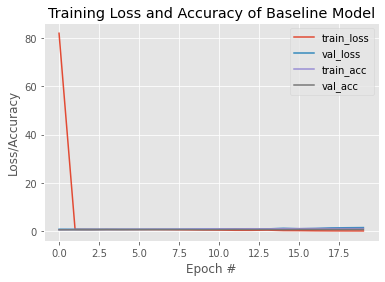

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, NUM_EPOCHS), history_baseline_model.history["loss"], label="train_loss")
plt.plot(np.arange(0, NUM_EPOCHS), history_baseline_model.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, NUM_EPOCHS), history_baseline_model.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, NUM_EPOCHS), history_baseline_model.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy of Baseline Model")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [ ]:
## Declare Model 2 for Optimization and Hyperparameter Tuning. 
model_2_train = defineModel2()
model_2_train.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 350, 350, 60)      1680      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 175, 175, 60)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 175, 175, 90)      48690     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 87, 87, 90)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 87, 87, 120)       97320     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 43, 43, 120)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 43, 43, 180)      

In [ ]:
history = model_2_train.fit(x_train_2, y_train_2, validation_data = (x_test_2,y_test_2), batch_size=12, epochs=NUM_EPOCHS)

Train on 860 samples, validate on 152 samples
Epoch 1/20
860/860 [==============================] - 12s 14ms/step - loss: 18.8140 - accuracy: 0.5047 - val_loss: 0.6779 - val_accuracy: 0.6118
Epoch 2/20
860/860 [==============================] - 10s 12ms/step - loss: 0.6833 - accuracy: 0.5593 - val_loss: 0.7183 - val_accuracy: 0.4276
Epoch 3/20
860/860 [==============================] - 10s 12ms/step - loss: 0.6609 - accuracy: 0.5919 - val_loss: 0.6475 - val_accuracy: 0.6974
Epoch 4/20
860/860 [==============================] - 10s 12ms/step - loss: 0.6503 - accuracy: 0.6291 - val_loss: 0.6393 - val_accuracy: 0.6645
Epoch 5/20
860/860 [==============================] - 10s 12ms/step - loss: 0.6434 - accuracy: 0.6337 - val_loss: 0.6453 - val_accuracy: 0.6579
Epoch 6/20
860/860 [==============================] - 10s 12ms/step - loss: 0.6152 - accuracy: 0.6628 - val_loss: 0.6948 - val_accuracy: 0.5263
Epoch 7/20
860/860 [==============================] - 10s 12ms/step - loss: 0.5947 - accu

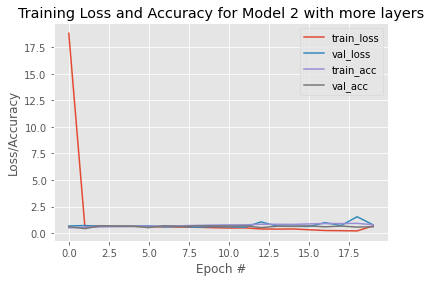

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, NUM_EPOCHS), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, NUM_EPOCHS), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, NUM_EPOCHS), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, NUM_EPOCHS), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy for Model 2 with more layers")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [ ]:
#################  Predictions #############################

In [ ]:
X_test = readAndResizeImages2(test_path)
print(X_test[0].shape)
print(X_test[0].size)

x_test_3 = np.array(X_test)

100%|██████████| 100/100 [00:00<00:00, 181.72it/s]

(350, 350, 3)
367500


In [ ]:
#Prediction for whole test  set
results = model_2_train.predict_classes(x_test_3)

In [ ]:
#Category Mapping Function for example images to be shown from test set prediction
def getCategory(value):
  category = ''

  if value == 0:
    category = 'cat'
  else :
    category = 'dog'

  return category


yups


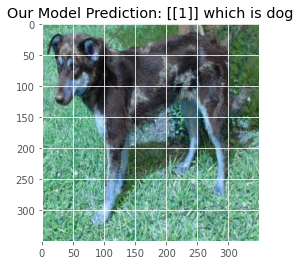

In [ ]:
image = X_test[70]
test_pred = model_2_train.predict_classes(image.reshape(1, 350, 350, 3))

plotImage(image,"Our Model Prediction: {}".format(test_pred) + " which is " + getCategory(test_pred))

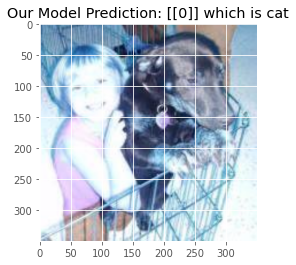

In [ ]:
image2 = X_test[50]
test_pred_50 = model_2_train.predict_classes(image2.reshape(1, 350, 350, 3))

plotImage(image2,"Our Model Prediction: {}".format(test_pred_50)+ " which is " + getCategory(test_pred_50))

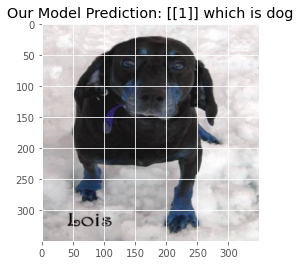

In [ ]:
image3 = X_test[54]
test_pred_54 = model_2_train.predict_classes(image3.reshape(1, 350, 350, 3))

plotImage(image3,"Our Model Prediction: {}".format(test_pred_54)+ " which is " + getCategory(test_pred_54))

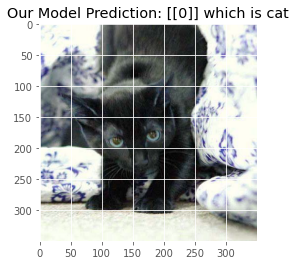

In [ ]:
image4 = X_test[19]
test_pred_19 = model_2_train.predict_classes(image4.reshape(1, 350, 350, 3))

plotImage(image4,"Our Model Prediction: {}".format(test_pred_19)+ " which is " + getCategory(test_pred_19))

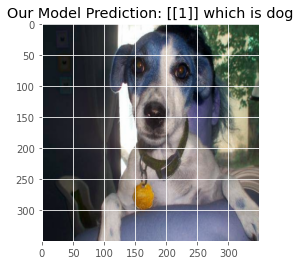

In [ ]:
image5 = X_test[15]
test_pred_15 = model_2_train.predict_classes(image5.reshape(1, 350, 350, 3))

plotImage(image5,"Our Model Prediction: {}".format(test_pred_15)+ " which is " + getCategory(test_pred_15))

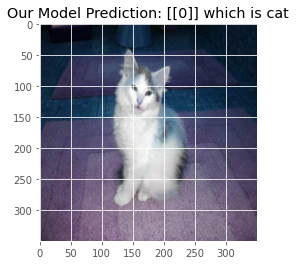

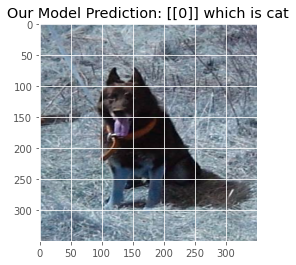

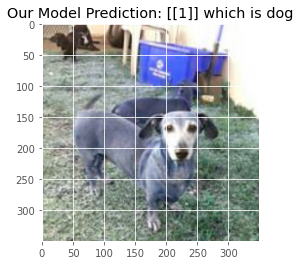

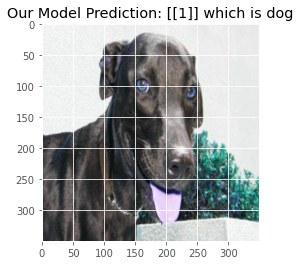

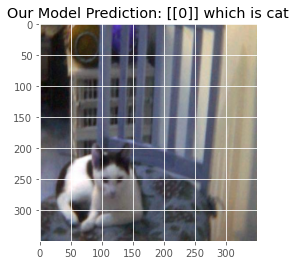

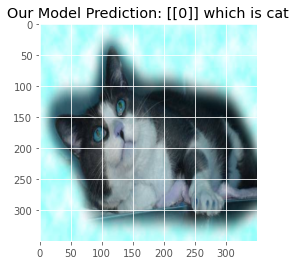

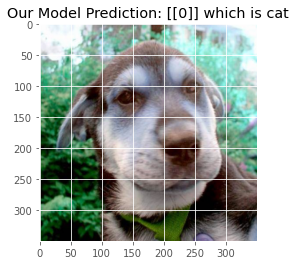

In [ ]:
#Predict for first few images
for i in range(1,8):
  image = X_test[i]

  test_pred = model_2_train.predict_classes(image.reshape(1, 350, 350, 3))

  plotImage(image,"Our Model Prediction: {}".format(test_pred)+ " which is " + getCategory(test_pred))